In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_rows', 6000)
pd.set_option('display.max_columns', 500)

In [2]:
# Import of the .csv file with the correct encoding

df = pd.read_csv("input/GSAF5.csv", encoding = "ISO-8859-1")

# First glimpse of the dataset

df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


# DATA CLEANING


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 24 columns):
Case Number               5992 non-null object
Date                      5992 non-null object
Year                      5992 non-null int64
Type                      5992 non-null object
Country                   5949 non-null object
Area                      5590 non-null object
Location                  5496 non-null object
Activity                  5465 non-null object
Name                      5792 non-null object
Sex                       5425 non-null object
Age                       3311 non-null object
Injury                    5965 non-null object
Fatal (Y/N)               5973 non-null object
Time                      2779 non-null object
Species                   3058 non-null object
Investigator or Source    5977 non-null object
pdf                       5992 non-null object
href formula              5991 non-null object
href                      5989 non-null object
C

In [4]:
#Columns with high NaN values.

nullvals = df.isnull().sum()[df.isnull().sum() > 0]
nullvals

Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
href formula                 1
href                         3
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

In [5]:
# Of the 5992 records, in the column "Unnamed 22" and "Unnamed: 23"
# there is practically nothing else but NaN and a couple of 
# records with no value.

display(df[df["Unnamed: 22"].notnull()])
df["Unnamed: 22"].isnull().value_counts() 

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1247,2006.06.18,18-Jun-06,2006,Unprovoked,BRAZIL,Pernambuco,"Punta Del Chifre Beach, Olinda",Body boarding,Humberto Pessoa Batista,M,27,Left thigh bitten FATAL,Y,09h00,NaN,globalsurfnews.com,2006.06.18-Batista.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.06.18,2006.06.18,4746,stopped here,NaN


True     5991
False       1
Name: Unnamed: 22, dtype: int64

In [6]:
display(df["Unnamed: 23"].isnull().value_counts())
df[df["Unnamed: 23"].notnull()]

True     5990
False       2
Name: Unnamed: 23, dtype: int64

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
4182,1952.07.13,13-Jul-52,1952,Provoked,USA,California,"San Diego, San Diego County",Fishing,"Gerald Howard, on board sportsfishing boat Ter...",M,34,Part of hand removed by shark he had caught PR...,N,NaN,NaN,"L.A. Times, 7/14/1952",1952.07.13-Howard.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.07.13,1952.07.13,1811,NaN,Teramo
5585,1879.03.10,10-Mar-1879,1879,Invalid,AUSTRALIA,New South Wales,Near Sydney,The steamship Bonnie Dundee lost in collision,Cabin boy of the Bonnie Dundee,M,NaN,Partial remains found in shark,Y,NaN,NaN,"Star, 3/22/1879",1879.03.10-Bonnie-Dundee.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1879.03.10,1879.03.10,408,NaN,change filename


In [8]:
# Selection of the variables that may be of interest to my study

df2 = df[["Year", "Type", "Country", "Area", "Sex ", "Age", "Injury", "Fatal (Y/N)", "Species "]]

df2.head()

,Year,Type,Country,Area,Sex,Age,Injury,Fatal (Y/N),Species
0,2016,Unprovoked,USA,Florida,M,16,Minor injury to thigh,N,NaN
1,2016,Unprovoked,USA,Florida,M,36,Lacerations to hands,N,NaN
2,2016,Unprovoked,USA,Florida,M,43,Lacerations to lower leg,N,NaN
3,2016,Unprovoked,AUSTRALIA,Victoria,M,NaN,Struck by fin on chest & leg,N,NaN
4,2016,Unprovoked,AUSTRALIA,Victoria,M,NaN,No injury: Knocked off board by shark,N,2 m shark


In [9]:
# I arrange the name of the columns

col = {"Sex ": "Sex","Fatal (Y/N)": "Fatal","Species ": "Species"}

df2 = df2.rename(columns = col)

df2.head()

,Year,Type,Country,Area,Sex,Age,Injury,Fatal,Species
0,2016,Unprovoked,USA,Florida,M,16,Minor injury to thigh,N,NaN
1,2016,Unprovoked,USA,Florida,M,36,Lacerations to hands,N,NaN
2,2016,Unprovoked,USA,Florida,M,43,Lacerations to lower leg,N,NaN
3,2016,Unprovoked,AUSTRALIA,Victoria,M,NaN,Struck by fin on chest & leg,N,NaN
4,2016,Unprovoked,AUSTRALIA,Victoria,M,NaN,No injury: Knocked off board by shark,N,2 m shark


In [10]:
# What kind of data do I have?

df2.dtypes

Year        int64
Type       object
Country    object
Area       object
Sex        object
Age        object
Injury     object
Fatal      object
Species    object
dtype: object

In [11]:
#Casting from the Age column to int and from Fatal to Boolean

def deadornot(x):
    if x == "Y":
        return True
    elif x == "N":
        return False
    return np.nan

df2["Fatal"] = df2["Fatal"].apply(deadornot)


try:
    df2["Age"].astype("int")
    df2["Fatal"].astype("bool")
    
except ValueError:
    print("Cannot convert float NaN.")

Cannot convert float NaN.


In [12]:
df2.dtypes

Year        int64
Type       object
Country    object
Area       object
Sex        object
Age        object
Injury     object
Fatal      object
Species    object
dtype: object

In [13]:
df2.shape

(5992, 9)

# What years have a lesser abundance of data?

In [14]:
#There are no Year values with NaN.

df2["Year"].isnull().value_counts() 

False    5992
Name: Year, dtype: int64

In [15]:
year_freq = df2.sort_values(by="Year", ascending = False)["Year"].value_counts()

(array([1.260e+02, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 5.000e+00, 3.400e+01, 5.826e+03]),
 array([   0. ,  201.6,  403.2,  604.8,  806.4, 1008. , 1209.6, 1411.2,
        1612.8, 1814.4, 2016. ]),
 <a list of 10 Patch objects>)

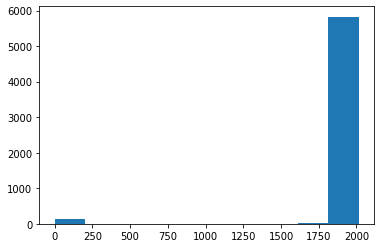

In [16]:
plt.hist(df2["Year"])

This is an approximation of my records by year. There's a clear imbalance.

In [17]:
relevant_years = (df2[df2["Year"] > 1700])

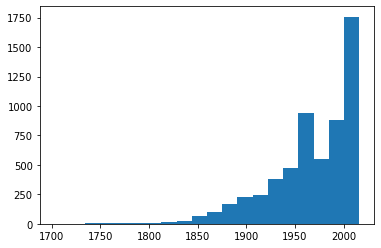

In [18]:
fig1 = plt.hist(relevant_years["Year"], bins=20)

In [19]:
#Do I have any duplicates? No.

print(relevant_years.shape)
print(relevant_years.drop_duplicates().shape)

(5852, 9)
(5822, 9)


In [20]:
# I'm interested in the NaN ratio per year. I count the number of 
# nulls per row and calculate the ratio with an accuracy of 2 decimals.

NaN_ratio = round((relevant_years.isnull().sum(axis=1))*100/9, 2)


In [21]:
relevant_years["NaN ratio"] = NaN_ratio

relevant_years.head()

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,Type,Country,Area,Sex,Age,Injury,Fatal,Species,NaN ratio
0,2016,Unprovoked,USA,Florida,M,16,Minor injury to thigh,False,NaN,11.11
1,2016,Unprovoked,USA,Florida,M,36,Lacerations to hands,False,NaN,11.11
2,2016,Unprovoked,USA,Florida,M,43,Lacerations to lower leg,False,NaN,11.11
3,2016,Unprovoked,AUSTRALIA,Victoria,M,NaN,Struck by fin on chest & leg,False,NaN,22.22
4,2016,Unprovoked,AUSTRALIA,Victoria,M,NaN,No injury: Knocked off board by shark,False,2 m shark,11.11


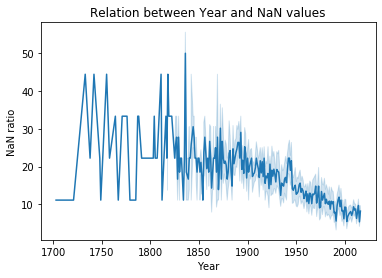

In [22]:
# NaN ratio is plotted against Year to see if there is a 
# relationship to estimate since when the records are most 
# complete for analysis

fig2 = sns.lineplot(data=relevant_years, x="Year", y="NaN ratio", legend="brief").set_title("Relation between Year and NaN values")
plt.show()

In [23]:
# I will keep the dataset estimating that after 
# 1875 the tendency is to decrease

final_years = (df2[df2["Year"] > 1875])

final_years.info()

# 372 removed from the dataset


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5620 entries, 0 to 5620
Data columns (total 9 columns):
Year       5620 non-null int64
Type       5620 non-null object
Country    5590 non-null object
Area       5287 non-null object
Sex        5085 non-null object
Age        3263 non-null object
Injury     5601 non-null object
Fatal      5515 non-null object
Species    2988 non-null object
dtypes: int64(1), object(8)
memory usage: 439.1+ KB


# ¿Qué país tiene una mortalidad mayor?

In [24]:
clean_df = final_years
clean_df.head()

,Year,Type,Country,Area,Sex,Age,Injury,Fatal,Species
0,2016,Unprovoked,USA,Florida,M,16,Minor injury to thigh,False,NaN
1,2016,Unprovoked,USA,Florida,M,36,Lacerations to hands,False,NaN
2,2016,Unprovoked,USA,Florida,M,43,Lacerations to lower leg,False,NaN
3,2016,Unprovoked,AUSTRALIA,Victoria,M,NaN,Struck by fin on chest & leg,False,NaN
4,2016,Unprovoked,AUSTRALIA,Victoria,M,NaN,No injury: Knocked off board by shark,False,2 m shark


In [25]:
# Quick look at the NaN values in the Fatal column

clean_df[clean_df["Fatal"].isnull()]

,Year,Type,Country,Area,Sex,Age,Injury,Fatal,Species
54,2016,Unprovoked,AUSTRALIA,New South Wales,M,NaN,"No injury, but sharks repeatedly hit their fin...",NaN,Bronze whaler sharks x 3
401,2013,Unprovoked,USA,South Carolina,F,NaN,No details,NaN,NaN
1047,2008,Unprovoked,AUSTRALIA,New South Wales,M,NaN,NaN,NaN,"Tiger shark, 2.3m"
1142,2007,Invalid,SENEGAL,NaN,NaN,NaN,NaN,NaN,NaN
1844,2000,Invalid,NEW ZEALAND,North Island,M,27,Reported as shark attack but probable drowning,NaN,Shark involvement questionable
2025,1997,Unprovoked,BRAZIL,Rio de Janeiro,M,NaN,NaN,NaN,NaN
2035,1997,Unprovoked,USA,Hawaii,M,NaN,No details,NaN,NaN
2042,1996,Unprovoked,AUSTRALIA,Queensland,M,18,NaN,NaN,NaN
2070,1996,Unprovoked,USA,Hawaii,NaN,NaN,No details,NaN,NaN
2082,1996,Unprovoked,USA,Hawaii,M,NaN,No details,NaN,NaN


False    4154
True     1361
Name: Fatal, dtype: int64

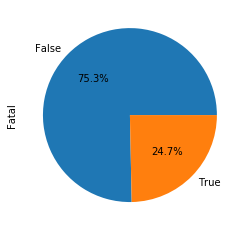

In [26]:
# Most of the records contain "Nan" and "No detail".
# I'm discarding them.

clean_fatals = clean_df.dropna(subset=["Fatal"], axis=0)


clean_fatals["Fatal"].value_counts()

fig3 = clean_fatals["Fatal"].value_counts().plot.pie(autopct='%1.1f%%')

clean_fatals["Fatal"].value_counts()

About a quarter of shark attack accidents are fatal.

## Country variable

In [28]:
# If we take a quick glimpse at the values by country, a bigger
# frequency of shark attacks in USA is noticeable.

clean_fatals["Country"].value_counts().head(10)

USA                 2029
AUSTRALIA           1167
SOUTH AFRICA         544
PAPUA NEW GUINEA     126
NEW ZEALAND          112
BRAZIL                99
BAHAMAS               94
MEXICO                77
ITALY                 61
PHILIPPINES           57
Name: Country, dtype: int64

In [30]:
# I decide to group all of them by the top three and differentiate them
# with continents.

asia = ['VIETNAM', 'IRAK', "YEMEN",'OKINAWA', 'IRAQ', 'THAILAND', 'SINGAPORE',"SUDAN",'SAUDI ARABIA',
        'Iraq', 'YEMEN ', 'Pakistan', 'Lebanon', 'PHILIPPINES', 'Jordan', "JAPAN", "IRAN",
       "HONG KONG", "INDIA", "INDONESIA", "TURKEY", "CHINA", "TAIWAN", "SRI LANKA", "SOUTH KOREA", "OKINAWA",
       "MALAYSIA", "ISRAEL", "LEBANON", "BURMA", "UNITED ARAB EMIRATES (UAE)", "SYRIA", "JAVA", " PHILIPPINES",
       "BANGLADESH", "KUWAIT", "ADMIRALTY ISLANDS", "UNITED ARAB EMIRATES"]
europe = ['CROATIA','SPAIN', 'GREECE', 'ITALY', 'ENGLAND', 'UNITED KINGDOM', 'SCOTLAND','FRANCE', 'PORTUGAL',
      'MALTA', 'AZORES', 'RUSSIA', 'UK', 'CRETE', 'IRELAND', 'MAYOTTE','CYPRUS', "GEORGIA", "MONACO",
      'SLOVENIA', 'NORWAY', "MONTENEGRO"]
africa = ['SENEGAL', 'TANZANIA', 'SOMALIA', 'ZA', 'LIBYA', "MOZAMBIQUE", "EGYPT", "KENYA", "MAURITIUS",
          "PALAU", "SIERRA LEONE", "NIGERIA", "CAPE VERDE", "LIBERIA", "KIRIBATI", "MADAGASCAR", "SEYCHELLES",
         "EGYPT", "TUNISIA", "GABON", "EGYPT ", "Sierra Leone", "Seychelles", "ANGOLA", "MAYOTTE", "NAMIBIA"]
oceania = ['PAPUA NEW GUINEA', 'REUNION', 'Faroe Islands', "NEW ZEALAND", "FIJI", "NEW CALEDONIA",
          "SOLOMON ISLANDS", "FRENCH POLYNESIA", "TONGA", "MARSHALL ISLANDS", "VANUATU", "NEW GUINEA", "SAMOA",
          "NEW BRITAIN", "OKINAWA", "MICRONESIA", "HONDURAS", "KIRIBATI", " TONGA", "FEDERATED STATES OF MICRONESIA",
          "Fiji", "WESTERN SAMOA"]
america = ["BRAZIL", "BAHAMAS", "MEXICO", "CUBA", "PANAMA", "JAMAICA", "BERMUDA", "COSTA RICA", "COLUMBIA",
          "CANADA", "VENEZUELA", "ECUADOR", "CHILE", "DOMINICAN REPUBLIC", "TURKS & CAICOS", "NICARAGUA",
          "HAITI", "BARBADOS", "JOHNSTON ISLAND", "BELIZE", "GUAM", "GRENADA", "EL SALVADOR", "AMERICAN SAMOA",
          "CAYMAN ISLANDS", "PARAGUAY", "MEXICO ", "URUGUAY", "ARGENTINA", "GUYANA", "TRINIDAD & TOBAGO",
          "GUATEMALA", "MALDIVE ISLANDS", "MALDIVE ISLANDS", "ST. MARTIN", "SAN DOMINGO", "CURACAO", 
          "MARTINIQUE", "PUERTO RICO", "NICARAGUA ", "ARUBA", "NORTHERN MARIANA ISLANDS", "FALKLAND ISLANDS",
          "NEVIS", "ST. MAARTIN", "ANTIGUA"]

def whichConti(country):
    if country in asia:
        return "Asia"
    elif country in europe:
        return "Europe"
    elif country in africa:
        return "Africa"
    elif country in oceania:
        return "Oceania"
    elif country in america:
        return "America"
    else:
        return country

clean_fatals["Continent"] = clean_fatals["Country"].apply(whichConti)
        

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [31]:
# Once the Continent column has been defined for each country, 
# we list the components of this column and see that there are 
# spurious and imprecise values. Besides, their frequency is 
# minimal, so we discarded these values.

dirty_continents = clean_fatals["Continent"].value_counts().index.tolist()
continent = ["America", "Oceania", "Africa", "Asia", "Europe", "USA", "Australia", "South Africa"]
spurious_country = [e for e in dirty_continents if e not in continent]

reset_df = clean_fatals.reset_index()

for count,e in enumerate(reset_df["Continent"]):
    if e in spurious_country:
        reset_df = reset_df.drop(count)

        

reset_df["Continent"].value_counts()

USA        2029
Oceania     514
America     485
Asia        285
Europe      199
Africa      155
Name: Continent, dtype: int64

In [32]:
# Number of fatal cases:

fatal_records = (reset_df[reset_df["Fatal"] == True])

fatal_group = fatal_records.groupby(["Continent"]).count()

fatal_group

,index,Year,Type,Country,Area,Sex,Age,Injury,Fatal,Species
Continent,,,,,,,,,,
Africa,75,75,75,75,57,62,29,75,75,20
America,188,188,188,188,156,162,87,188,188,45
Asia,145,145,145,145,114,119,53,145,145,29
Europe,63,63,63,63,57,53,24,63,63,27
Oceania,182,182,182,182,167,161,81,182,182,58
USA,221,221,221,221,221,212,108,221,221,88


In [33]:
# Grouping them.


group = reset_df.groupby(["Continent"]).agg({"index":"count"})
group["Fatals"] = fatal_group["index"]
group["Fatality %"] = group.apply(lambda x: x["Fatals"] / x["index"]*100, axis=1)


In [34]:
# New column with the Fatal ratio.

group



,index,Fatals,Fatality %
Continent,,,
Africa,155,75,48.387097
America,485,188,38.762887
Asia,285,145,50.877193
Europe,199,63,31.658291
Oceania,514,182,35.408560
USA,2029,221,10.892065


## To do

Since reality shouldn't spoil a good headline:

- I intend to go back to my initial hypothesis of trying to establish a relationship between the fatality ratio and health expenditure per capita.

- Group these data by legislature to see if changes in government have an effect.

- Check whether opening an Ironhack campus is an effective social and health measure.